In [1]:
import madmom
import mirdata
import jams
import os

In [4]:
keymodel = madmom.features.CNNKeyRecognitionProcessor()

In [5]:
keymodel

In [6]:
billboard_dirpath = '/scratch/work/sonyc/marl/private_datasets/billboard_burgoyne2013/mp3/'

In [2]:
giantsteps_key = mirdata.initialize('giantsteps_key', data_home='/scratch/qx244/data/gskey')

In [3]:
gs_ids = giantsteps_key.track_ids
gs_data = giantsteps_key.load_tracks()

In [4]:
good_files = {}

for i in range(len(gs_ids)):
    sample_track = gs_data[gs_ids[i]]
    key_list = sample_track.key.split('|')
    tonic_list = [k.strip().split(' ')[0] for k in key_list]
#     print(i, tonic_list, key_list)
    if len(tonic_list) > 1 and tonic_list[0] != tonic_list[1]:
#         print(i, tonic_list, key_list)
        pass
    elif tonic_list[0] == 'X':
#         print(i, tonic_list, key_list)
        pass
    else:
        good_files[str(i+1)] = tonic_list[0].strip('^_')
        
print(len(good_files))

551


In [13]:
import json

with open('/scratch/qx244/data/gskey/good_files.json', 'w') as fp:
    json.dump(good_files, fp)

In [14]:
with open('/scratch/qx244/data/gskey/good_files.json', 'r') as fp:
    gf = json.load(fp)

## Data Augmentation

In [57]:
for i in good_files.keys():
    print(good_files[i], gs_data[i].key)
    track = gs_data[i]
    j = track.to_jams()
    file_duration = j.file_metadata.duration
    key_anno = jams.Annotation(namespace='key_mode', duration=file_duration)
    key_anno.append(time=0, duration=file_duration, value=good_files[i], confidence=1)
    j.annotations.append(key_anno)
    break
    j.save(os.path.join('/scratch/qx244/data/gskey/jams/', track.title + '.jams'))

C C minor
F F minor dorian
D D major
E E minor
E E minor
E E major ionian
Eb Eb other
F F minor
Gb Gb minor harmonic
G G major phrygian-major
Ab Ab major
E E major | E minor
G G minor harmonic
A A minor
A A minor
F F minor
Bb Bb minor
C C minor
G G minor
Gb Gb minor aeolian
C C major mixolydian
G G minor aeolian
C C major
G G minor aeolian
Gb Gb minor | Gb major
D D minor
D D minor
E E minor
Bb Bb major ionian
G G major
G G minor phrygian
G G minor phrygian
F F minor
Bb Bb major ionian
Bb Bb major mixolydian
B B minor aeolian
F F minor harmonic
F F minor
D D minor
Eb Eb minor aeolian
F F major
C C minor
B B minor dorian
C C minor aeolian
E E major
B B minor
Ab Ab major
A A minor aeolian
Eb Eb minor
Db Db minor
F F major
G G minor
A A minor aeolian
Ab Ab minor aeolian
Gb Gb minor phrygian
C C minor
Eb Eb major | Eb minor
Ab Ab major mixolydian
Eb Eb other
E E major
D D major
Gb Gb minor
G G other
C C major
Gb Gb other
C C minor aeolian
D D minor phygian
A A minor
Eb Eb major mixolydian 

Db Db minor aeolian
E E_ major ionian
A A major ionian
Bb Bb minor
D D minor aeolian
G G major | G minor aeolian
E E major mixolydian | E minor
A A minor aeolian
E E minor
E E minor phrygian
Eb Eb major ionian
F F minor aeolian
E E minor harmonic
D D major
B B minor
F F minor | F major
G G minor
Bb Bb minor dorian
Eb Eb minor harmonic
F F minor aeolian
Db Db other
Eb Eb^ minor
B B_ other
E E other
C C major | C minor aeolian


In [49]:
j

<JAMS(file_metadata=<FileMetadata(...)>,
      annotations=[1 annotation],
      sandbox=<Sandbox(...)>)>

In [5]:
import muda

In [6]:
for idx in good_files.keys():
    track = gs_data[idx]
    break

In [7]:
track

Track(
  audio_path="/scratch/qx244/data/gskey/audio/1004923 Kaiserdisco - Carachillo (Original Mix).mp3",
  keys_path="/scratch/qx244/data/gskey/keys_gs+/1004923 Kaiserdisco - Carachillo (Original Mix).txt",
  metadata_path="/scratch/qx244/data/gskey/meta/1004923 Kaiserdisco - Carachillo (Original Mix).json",
  title="1004923 Kaiserdisco - Carachillo (Original Mix)",
  track_id="1",
  artists: ,
  audio: The track's audio

        Returns,
  genres: ,
  key: ,
  tempo: ,
)

In [8]:
track_jams_path = os.path.join('/scratch/qx244/data/gskey/jams/', track.title + '.jams')

In [9]:
j_orig = muda.load_jam_audio(track_jams_path, track.audio_path)

/scratch/qx244/envs/crema/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [10]:
pitch_shifter = muda.deformers.LinearPitchShift(n_samples=12, lower=-5, upper=6)

In [11]:
j_orig

<JAMS(file_metadata=<FileMetadata(...)>,
      annotations=[1 annotation],
      sandbox=<Sandbox(...)>)>

In [12]:
for i, jam_out in enumerate(pitch_shifter.transform(j_orig)):
    muda.save('/scratch/qx244/data/gskey/augmentation/{}.{:02d}.ogg'.format(track.title, i),
              '/scratch/qx244/data/gskey/augmentation/{}.{:02d}.jams'.format(track.title, i),
              jam_out)

In [18]:
import librosa

In [19]:
librosa.

'0.8.0'

In [12]:
!module list

/bin/sh: 1: module: not found


In [53]:
sample_key_out = keymodel(sample_track.audio_path)

In [54]:
sample_key_out.shape

(1, 24)

In [55]:
sample_key_out

array([[0.00446847, 0.00263213, 0.00895507, 0.12546635, 0.06958276,
        0.0043388 , 0.01167696, 0.0177019 , 0.00560365, 0.05828963,
        0.07017179, 0.09920054, 0.00467766, 0.00322618, 0.00451668,
        0.28698324, 0.02082669, 0.00456685, 0.0150263 , 0.02050542,
        0.01965113, 0.01592189, 0.07276972, 0.05324018]])

In [56]:
import matplotlib.pyplot as plt

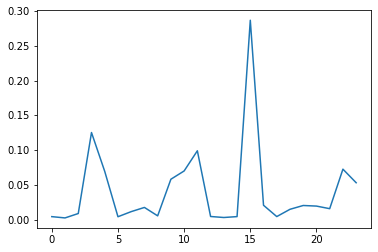

In [59]:
plt.plot(sample_key_out.T)
plt.show()

In [60]:
len(gs_ids)

600

In [61]:
sample_track.key

'Ab major'

In [18]:
os.path.isfile('/scratch/qx244/data/gskey/augmentation/{}.11.jams'.format(track.title))

True

In [19]:
for i in range(10):
    if i == 3:
        continue
    print(i)

0
1
2
4
5
6
7
8
9


In [21]:
from IPython.display import Audio

In [22]:
import librosa

In [25]:
y, sr = librosa.load('/scratch/qx244/data/gskey/augmentation/{}.00.ogg'.format(track.title))